# SIR Model - Epidemic Dynamics

**Simple SIR Model - Activity ONE**

In [1]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

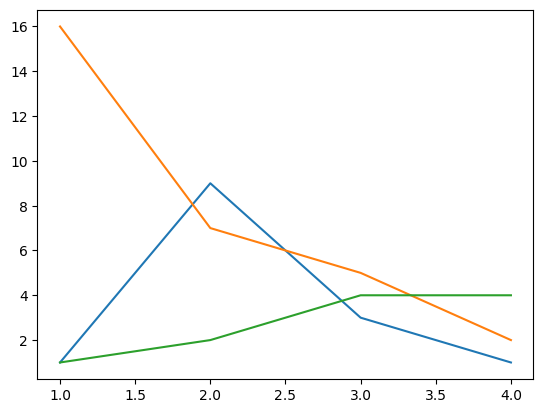

In [2]:
#Shortest Mathplotlib tutorial ever.
#Just use this - you need to arrange the data each time as below -
#but really you don't need all the bells and whistles.
import matplotlib.pyplot as plt

number_of_days = [1, 2, 3, 4]
susceptible = [1,  9, 3, 1]
infected = [1,  9, 3, 1]
recovered = [1,  2, 4, 4]

plt.plot([1, 2, 3, 4], [1,  9, 3, 1])
plt.plot([1, 2, 3, 4], [16, 7, 5, 2])
plt.plot([1, 2, 3, 4], [1,  2, 4, 4])

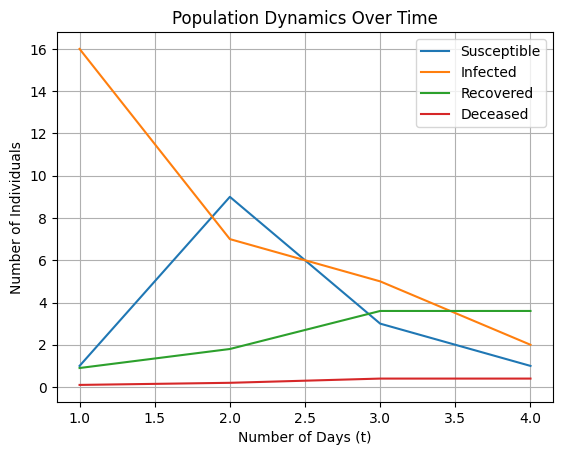

In [3]:
number_of_days = [1, 2, 3, 4]
susceptible = [1,  9, 3, 1]
infected = [16, 7, 5, 2]
recovered = [0.9, 1.8, 3.6, 3.6]
deceased = [0.1, 0.2, 0.4, 0.4]

plt.plot(number_of_days, susceptible, label='Susceptible')
plt.plot(number_of_days, infected, label='Infected')
plt.plot(number_of_days, recovered, label='Recovered')
plt.plot(number_of_days, deceased, label='Deceased')

plt.xlabel('Number of Days (t)')
plt.ylabel('Number of Individuals')
plt.title('Population Dynamics Over Time')
plt.legend()
plt.grid(True)  # Add gridlines for better readability
plt.show()

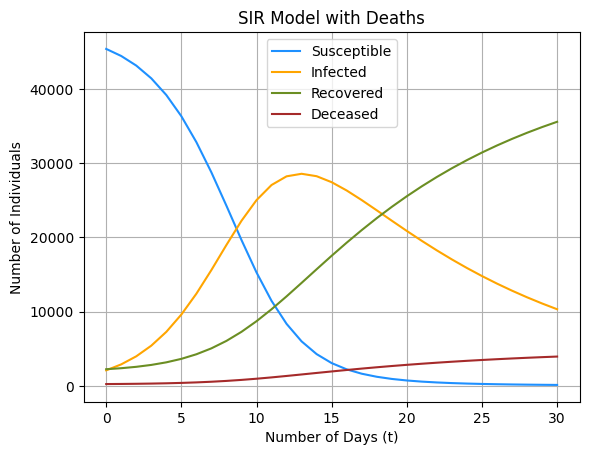

In [4]:
#Use Pseudocode from Calculus in Context, Chapter 2 page 69 to plot the 3 functions S, I and R. 
#Use a (.00001)and b (14) as varibles instead of numbers
#Use a fixed plot window with y as the total height and fix the number of days you want to explore.
#Once it is working, add a new rate equation for Deaths by splitting up the "Recovered" 2 equations.
#For example 10 percent pass to death and 90 percent pass to recovered.
#Please comment your code.

#CODE HERE
# Initial conditions and parameters
tinitial = 0  # Start at Day 0
tfinal = 30  # Total number of days
t = tinitial

a = 0.00001  # Percent of people that had contact and were infected
b = 14  # Number of days it takes to recover from an infection

S = 45400  # Number of Susceptible people
I = 2100  # Number of Infected people
R = 2500  # Number of Recovered people
D = 0.1 * R  # Number of Deceased people = 10% from Recovered
R = 0.9 * R  # Adjusted recovered population after subtracting deaths

numberofsteps = 30  # Number of divisions in the graph
deltat = (tfinal - tinitial) / numberofsteps  # Time step size

# Arrays to store results
s = [S]
i = [I]
r = [R]
d = [D]
T = [t]

# Time evolution loop
for k in range(1, numberofsteps + 1):
    # Rate equations
    Sprime = -a * S * I
    Iprime = a * S * I - I / b
    Rprime = (I / b) * 0.9  # 90% of recovered people
    Dprime = (I / b) * 0.1  # 10% of infected people pass to deceased

    # Update the values using the rate equations
    deltaS = Sprime * deltat
    deltaI = Iprime * deltat
    deltaR = Rprime * deltat
    deltaD = Dprime * deltat

    # Update S, I, R, D for the next step
    S = S + deltaS
    I = I + deltaI
    R = R + deltaR
    D = D + deltaD
    t = t + deltat

    # Append the new values to the arrays
    s.append(S)
    i.append(I)
    r.append(R)
    d.append(D)
    T.append(t)

# Plotting the results after the loop
plt.plot(T, s, color='dodgerblue', label='Susceptible')
plt.plot(T, i, color='orange', label='Infected')
plt.plot(T, r, color='olivedrab', label='Recovered')
plt.plot(T, d, color='brown', label='Deceased')

# Label the graph
plt.xlabel('Number of Days (t)')
plt.ylabel('Number of Individuals')
plt.legend()

# Display the plot
plt.grid(True)
plt.title('SIR Model with Deaths')
plt.show()

**Question 1:**
Test your model with a = .00001 and b = 10 over 50 days and check with the given textbook. Show the output. Provide simple context for this model with comments or text.

ANSWER: 
When graphing the results of an epidemic, the Susceptible function always starts with a downward curve because nobody has become infected. Similarly, the Infected curve is the opposite of the Susceptible curve because, to declare a person as recovered or deceased, first they must be infected. Notice how the Infected curve has a bell shape. After this curve reaches its peak, there are one of two outcomes: recovery or death. Moreover, Recovered can be split into two parts: Recovered and Deceased. The reason is that not everyone that is infected recovers. Finally, the percentage of Recovered and Deceased must add up to 100%. After 50 days, the graph has the same four curves (S, I, R, and D) as the graph on pp. 100 of the Calculus in Context textbook, which tells us our model is correct (see graph below).

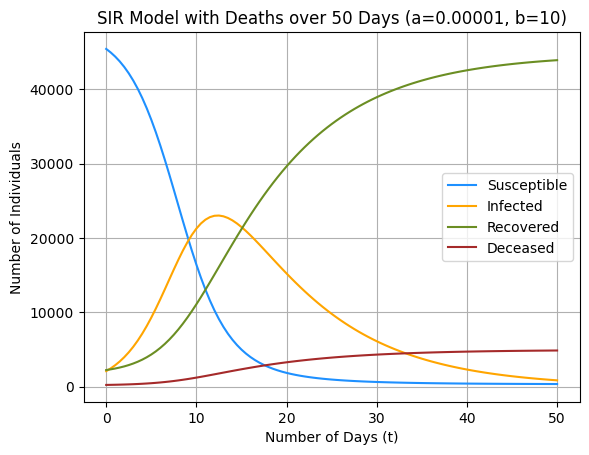

In [5]:
# Initial conditions and parameters
tinitial = 0  # Start at Day 0
tfinal = 50  # Total number of days for the simulation
t = tinitial  # Initialize time at 0

a = 0.00001  # Infection rate per contact
b = 10  # Number of days it takes to recover from an infection

# Initial population groups
S = 45400  # Initial number of susceptible people
I = 2100  # Initial number of infected people
R = 2500  # Initial number of recovered people

# Calculate initial deaths
D = 0.1 * R  # 10% of recovered people are deceased
R = 0.9 * R  # 90% of recovered people remain recovered

numberofsteps = 100  # Increased number of time steps for better resolution
deltat = (tfinal - tinitial) / numberofsteps  # Time step size

# Arrays to store the results
s = [S]  # Array for susceptible values
i = [I]  # Array for infected values
r = [R]  # Array for recovered values
d = [D]  # Array for deceased values
T = [t]  # Array for time values

# Time evolution loop to compute the values at each time step
for k in range(1, numberofsteps + 1):
    # Rate equations (S', I', R', D')
    Sprime = -a * S * I  # Change in susceptible
    Iprime = a * S * I - I / b  # Change in infected
    Rprime = (I / b) * 0.9  # 90% of the infected recover
    Dprime = (I / b) * 0.1  # 10% of the infected die

    # Update the values using the rate equations
    deltaS = Sprime * deltat
    deltaI = Iprime * deltat
    deltaR = Rprime * deltat
    deltaD = Dprime * deltat

    # Update S, I, R, D for the next time step
    S = S + deltaS
    I = I + deltaI
    R = R + deltaR
    D = D + deltaD
    t = t + deltat

    # Append the updated values to the arrays
    s.append(S)
    i.append(I)
    r.append(R)
    d.append(D)
    T.append(t)

# Plotting the results after the loop
plt.plot(T, s, color='dodgerblue', label='Susceptible')
plt.plot(T, i, color='orange', label='Infected')
plt.plot(T, r, color='olivedrab', label='Recovered')
plt.plot(T, d, color='brown', label='Deceased')

# Add labels, title, and legend to the graph
plt.xlabel('Number of Days (t)')
plt.ylabel('Number of Individuals')
plt.title('SIR Model with Deaths over 50 Days (a=0.00001, b=10)')
plt.legend()

# Show the plot with a grid
plt.grid(True)
plt.show()

**Question 2:** Using your SIRPLOT code above, explore what happens when you change the length of time a disease takes to recover (which may happen with a new medicine for example). Provide examples from your model in code blocks and context and explanation in textblocks.

ANSWER: By changing coefficient b, we see the number of days it takes for any given person to recover while remaining infected and contagious between Susceptible and Recovered (i.e., one sick person takes 14 days to recover equals 1/14, where b = 14). If b = 1, it only takes a person one day to recover, which means the medicine is highly effective as it cures more people, and rarely does anybody die. Similarly, the epidemic is short-lived, with S, I, R, and D only seeing slight changes, and the graph becomes flat (no new cases). To add some perspective (although hopefully not a realistic one), if it takes a person 100 days to recover (i.e., b = 100), then the Infection curve will be taller and longer lasting than the Recovered curve. In 50 days, this would be a bad scenario for medicine, as researchers would not know if there is a cure. An intermediate case would be one where an epidemic lasts 50 days (tfinal = 50), and the recovery time is also 50 days (b = 50). In this case,  the Infected and Recovered curve would reach a break-even point with a 50% chance of being either. The death rate would be considerably higher in the last two cases than in the first. To be more realistic, even at 14 days to recover, the Infection curve is still quite high, which also increases the death rate.

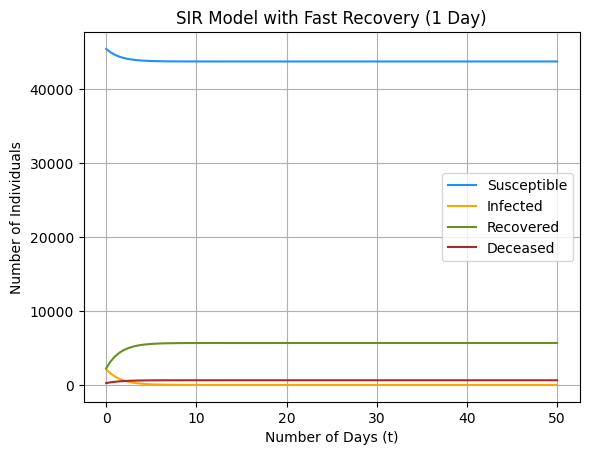

In [6]:
# Initial conditions and parameters for fast recovery (b = 1)
tinitial = 0  # Start at Day 0
tfinal = 50  # Total number of days for simulation
t = tinitial

a = 0.00001  # Infection rate per contact
b = 1  # Number of days it takes to recover from an infection (very fast recovery)

# Initial population groups
S = 45400  # Initial number of susceptible people
I = 2100  # Initial number of infected people
R = 2500  # Initial number of recovered people
D = 0.1 * R  # 10% of recovered people are deceased
R = 0.9 * R  # Remaining 90% of recovered people

numberofsteps = 100  # Increased number of time steps for better resolution
deltat = (tfinal - tinitial) / numberofsteps  # Time step size

# Arrays to store results
s = [S]  # Array for susceptible values
i = [I]  # Array for infected values
r = [R]  # Array for recovered values
d = [D]  # Array for deceased values
T = [t]  # Array for time values

# Time evolution loop
for k in range(1, numberofsteps + 1):
    # Rate equations
    Sprime = -a * S * I
    Iprime = a * S * I - I / b
    Rprime = (I / b) * 0.9
    Dprime = (I / b) * 0.1

    # Update values
    deltaS = Sprime * deltat
    deltaI = Iprime * deltat
    deltaR = Rprime * deltat
    deltaD = Dprime * deltat

    S += deltaS
    I += deltaI
    R += deltaR
    D += deltaD
    t += deltat

    # Append new values
    s.append(S)
    i.append(I)
    r.append(R)
    d.append(D)
    T.append(t)

# Plotting the results
plt.plot(T, s, color='dodgerblue', label='Susceptible')
plt.plot(T, i, color='orange', label='Infected')
plt.plot(T, r, color='olivedrab', label='Recovered')
plt.plot(T, d, color='brown', label='Deceased')

# Label the graph
plt.xlabel('Number of Days (t)')
plt.ylabel('Number of Individuals')
plt.title('SIR Model with Fast Recovery (1 Day)')
plt.legend()
plt.grid(True)
plt.show()

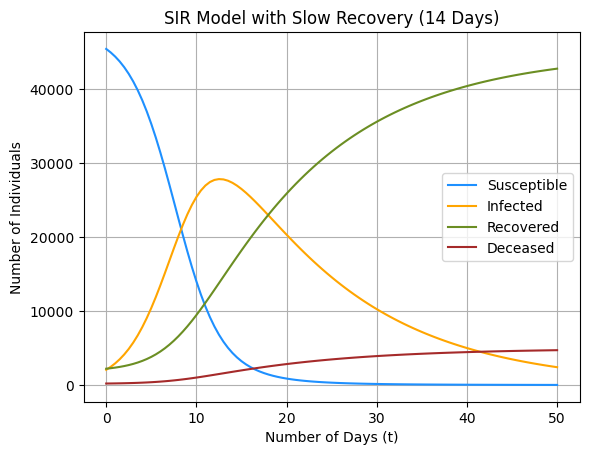

In [7]:
# Initial conditions and parameters for slow recovery (b = 14)
tinitial = 0  # Start at Day 0
tfinal = 50  # Total number of days for simulation
t = tinitial

a = 0.00001  # Infection rate per contact
b = 14  # Number of days it takes to recover from an infection (slower recovery)

# Initial population groups
S = 45400  # Initial number of susceptible people
I = 2100  # Initial number of infected people
R = 2500  # Initial number of recovered people
D = 0.1 * R  # 10% of recovered people are deceased
R = 0.9 * R  # Remaining 90% of recovered people

numberofsteps = 100  # Increased number of time steps for better resolution
deltat = (tfinal - tinitial) / numberofsteps  # Time step size

# Arrays to store results
s = [S]
i = [I]
r = [R]
d = [D]
T = [t]

# Time evolution loop
for k in range(1, numberofsteps + 1):
    # Rate equations
    Sprime = -a * S * I
    Iprime = a * S * I - I / b
    Rprime = (I / b) * 0.9
    Dprime = (I / b) * 0.1

    # Update values
    deltaS = Sprime * deltat
    deltaI = Iprime * deltat
    deltaR = Rprime * deltat
    deltaD = Dprime * deltat

    S += deltaS
    I += deltaI
    R += deltaR
    D += deltaD
    t += deltat

    # Append new values
    s.append(S)
    i.append(I)
    r.append(R)
    d.append(D)
    T.append(t)

# Plotting the results
plt.plot(T, s, color='dodgerblue', label='Susceptible')
plt.plot(T, i, color='orange', label='Infected')
plt.plot(T, r, color='olivedrab', label='Recovered')
plt.plot(T, d, color='brown', label='Deceased')

# Label the graph
plt.xlabel('Number of Days (t)')
plt.ylabel('Number of Individuals')
plt.title('SIR Model with Slow Recovery (14 Days)')
plt.legend()
plt.grid(True)
plt.show()

**Question 3:** Using your SIRPLOT code above, explore what happens to the course of a disease when you change the transmission coeffient a (which happens if people self-isolate for example). Provide examples from your model in code blocks and context and explanation in textblocks.

ANSWER: By changing coefficient a, we determine how many contacts that occur that also lead to infections (i.e., 1 infection out of 100,000 people equals 1/100,000 = 0.00001 = a). Within a 50-day period, if coefficient a = 0.00001 (1 positive case of infection for every 100,000 people), the curves S, I, R, and D behave like the graph in pp. 100 of the Calculus Companion textbook. By decreasing coefficient a to 0.000001, we notice a slight change in rate for each curve, but not enough to consider a medical emergency. In other words, very few people become infected or die, and a few reasons for this may be herd immunity, mandated self-isolation for the time it takes to recover to avoid contaminating other individuals, or advanced medicine. On the contrary, if 3 out of 100,000 persons become infected (a = 0.00003),  the Infection curve spikes within the first 6 to 7 days. Because the number of days remains unchanged at b = 10, a high percentage of people recover at a higher rate on day 12. However, infections are also related to deaths, which means that the Deceased curve also increases. In cases with high infection rates, government mandates to stay indoors would absolutely help in flattening the infection curve, at least until a cure is found or immunity is developed.

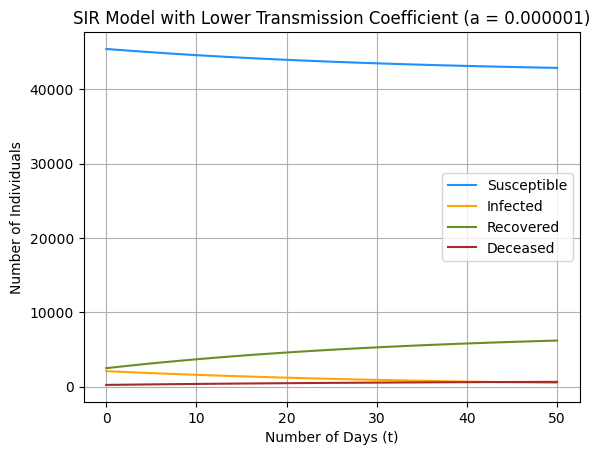

In [8]:
# Initial conditions and parameters
tinitial = 0  # Start at Day 0
tfinal = 50  # Total number of days
t = tinitial

# Decreased transmission coefficient
a = 0.000001  # Infection rate per contact (lower due to isolation)
b = 14  # Number of days it takes to recover from an infection

# Initial population groups
S = 45400  # Number of susceptible people
I = 2100  # Initial number of infected people
R = 2500  # Initial number of recovered people
D = 0.1 * R  # 10% of recovered people are deceased

numberofsteps = 100  # Increased number of time steps for better resolution
deltat = (tfinal - tinitial) / numberofsteps  # Time step size

# Arrays to store results
s = [S]  # Array for susceptible values
i = [I]  # Array for infected values
r = [R]  # Array for recovered values
d = [D]  # Array for deceased values
T = [t]  # Array for time values

# Time evolution loop
for k in range(1, numberofsteps + 1):
    # Rate equations
    Sprime = -a * S * I  # Change in susceptible population
    Iprime = a * S * I - I / b  # Change in infected population
    Rprime = (I / b) * 0.9  # 90% of infected recover
    Dprime = (I / b) * 0.1  # 10% of infected die

    # Update values
    deltaS = Sprime * deltat
    deltaI = Iprime * deltat
    deltaR = Rprime * deltat
    deltaD = Dprime * deltat

    S += deltaS
    I += deltaI
    R += deltaR
    D += deltaD
    t += deltat

    # Append new values
    s.append(S)
    i.append(I)
    r.append(R)
    d.append(D)
    T.append(t)

# Plotting the results
plt.plot(T, s, color='dodgerblue', label='Susceptible')
plt.plot(T, i, color='orange', label='Infected')
plt.plot(T, r, color='olivedrab', label='Recovered')
plt.plot(T, d, color='brown', label='Deceased')

# Label the graph
plt.xlabel('Number of Days (t)')
plt.ylabel('Number of Individuals')
plt.title('SIR Model with Lower Transmission Coefficient (a = 0.000001)')
plt.legend()
plt.grid(True)
plt.show()

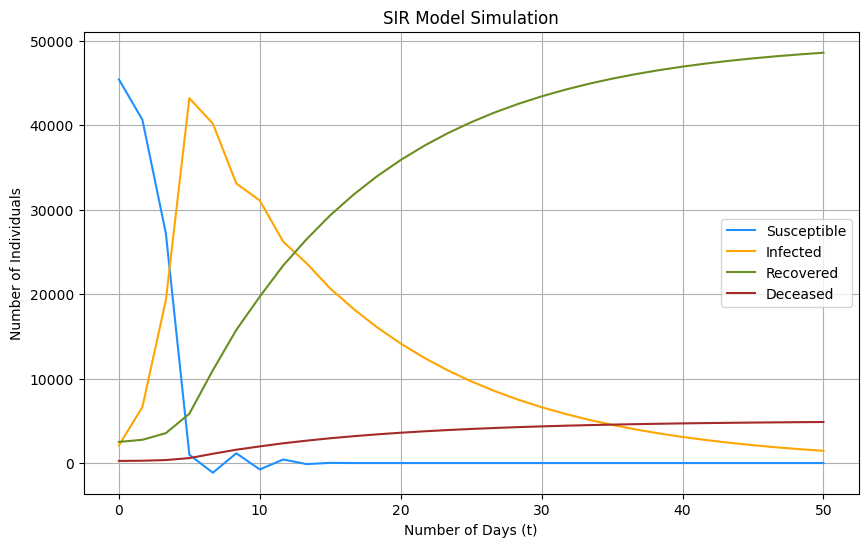

In [9]:
# Initial conditions and parameters
tinitial = 0  # Start at Day 0
tfinal = 50  # Total number of days
t = tinitial

a = 0.00003  # Infection rate per contact
b = 14  # Number of days it takes to recover from an infection

# Initial population groups
S = 45400  # Number of susceptible people
I = 2100  # Number of infected people
R = 2500  # Number of recovered people
D = 0.1 * R  # Number of deceased people (10% of recovered)

numberofsteps = 30  # Number of divisions in the graph
deltat = (tfinal - tinitial) / numberofsteps  # Time step size

# Arrays to store results
s = [S]  # Array for susceptible values
i = [I]  # Array for infected values
r = [R]  # Array for recovered values
d = [D]  # Array for deceased values
T = [t]  # Array for time values

# Time evolution loop
for k in range(1, numberofsteps + 1):
    # Rate equations
    Sprime = -a * S * I
    Iprime = a * S * I - I / b
    Rprime = I / b
    Dprime = Rprime * 0.1

    # Update the values using the rate equations
    deltaS = Sprime * deltat
    deltaI = Iprime * deltat
    deltaR = Rprime * deltat
    deltaD = Dprime * deltat

    # Update S, I, R, D for the next step
    S += deltaS
    I += deltaI
    R += deltaR
    D += deltaD
    t += deltat

    # Append the new values to the arrays
    s.append(S)
    i.append(I)
    r.append(R)
    d.append(D)
    T.append(t)

# Plotting the results after the loop
plt.figure(figsize=(10, 6))
plt.plot(T, s, color='dodgerblue', label='Susceptible')
plt.plot(T, i, color='orange', label='Infected')
plt.plot(T, r, color='olivedrab', label='Recovered')
plt.plot(T, d, color='brown', label='Deceased')

# Label the graph
plt.xlabel('Number of Days (t)')
plt.ylabel('Number of Individuals')
plt.legend()
plt.title('SIR Model Simulation')
plt.grid(True)

# Show the plot
plt.show()

**SIR with Differential Equations**

**Question 4:**
Look at the following implementation of SIR (adapted from the https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/) using differential equations. 

How is it the same and how is it different to SIRPLOT? Answer here with code and text examples.

ANSWER: 

Similarities: Both SIRPLOT and SIR w/ DE include the same variables--total population, Suceptible, Infected, Recovered, and beta. I have modified the SIRPLOT so that the curves have colors, and the SIR w/ DE does so, too. Moreover, the legend shows both graphs have the same-color curves--blue for Susceptible, green for Recovered, and red for Deceased, and the y-axes represent population and the x-axes days. Both implementations use appending of arrays. Both use the same Python libraries--numpy, scipy, and matplotlib. Both graphs share similar shapes for each of the curves, with the exception of deceased as it is not included in SIR w/ DE. Both use derivatives for the S, I, R-- SIRPLOT states this a Sprime, Iprime, and Rprime, while SIR w/ DE defines a function def deriv(y, t, N, beta, gamma). Moreover, on both programs the derivative formulas balance each other in that an addition of one is the subtraction of another, which results in conversation of information.

Differences: SIRPLOT assigns alpha to the percent of people that came in contact and were infected, whereas SIR w/ DE calls this value beta, and has variable gamma to show the mean recovery rate. The SIR w/ DE scales the graph in the thousands on the y-axis (and represents N = 1000 people) and from 0 to 160 days on the x-axis, while the SIRPLOT has population assigned to each of the S, I, R, D variables. Moreover, SIRPLOT includes a deaths/deceased curve that was split from the recovered curve, whereas the SIR w/ DE does not but instead has a curve for the population that recovered with immunity. As far as vectors, SIR w/ DE assignes them to a single variable, while SIRPLOT has one variable per vector. SIR w/ DE divides S, I, and R by 1000, whereas SIRPLOT does not. SIR w/ DE defines a function with differential equations, and SIPLOT uses a for loop w/o DE.

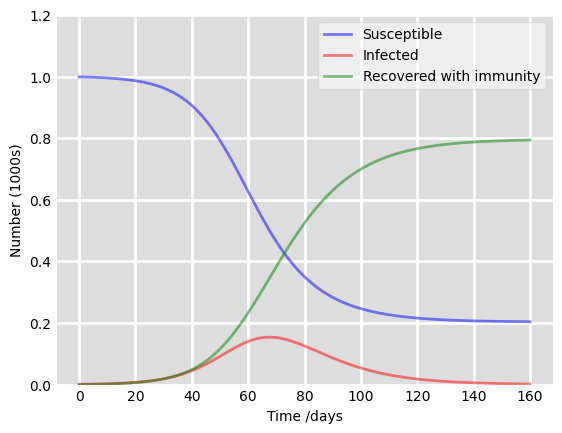

In [10]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, 1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', color='w', lw=2, ls='-')  # Updated line
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

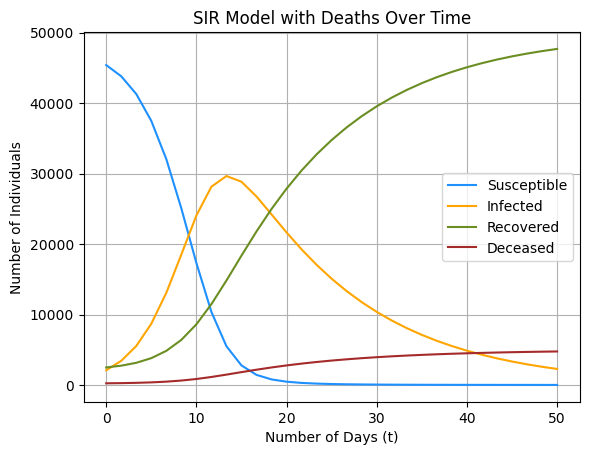

In [11]:
# Initial conditions and parameters
tinitial = 0  # Start at Day 0
tfinal = 50  # Total number of days
t = tinitial

a = 0.00001  # Infection rate per contact
b = 14  # Number of days it takes to recover from an infection

# Initial population groups
S = 45400  # Number of susceptible people
I = 2100  # Number of infected people
R = 2500  # Number of recovered people
D = 0.1 * R  # Number of deceased people (10% from recovered)

numberofsteps = 30  # Number of divisions in graph
deltat = (tfinal - tinitial) / numberofsteps  # Time step size

# Arrays to store results
s = [S]  # Array for values of S
i = [I]  # Array for values of I
r = [R]  # Array for values of R
d = [D]  # Array for values of D
T = [t]  # Array for values of time (t)

# Time evolution loop
for k in range(1, numberofsteps + 1):
    # Rate equations
    Sprime = -a * S * I
    Iprime = a * S * I - I / b
    Rprime = I / b
    Dprime = Rprime * 0.10  # 10% of recovered are deceased

    # Update the values using the rate equations
    deltaS = Sprime * deltat
    deltaI = Iprime * deltat
    deltaR = Rprime * deltat
    deltaD = Dprime * deltat

    # Update S, I, R, D for the next time step
    S += deltaS
    I += deltaI
    R += deltaR
    D += deltaD
    t += deltat

    # Append updated values to the arrays
    s.append(S)
    i.append(I)
    r.append(R)
    d.append(D)
    T.append(t)

# Plotting the results after the loop
plt.plot(T, s, color='dodgerblue', label='Susceptible')
plt.plot(T, i, color='orange', label='Infected')
plt.plot(T, r, color='olivedrab', label='Recovered')
plt.plot(T, d, color='brown', label='Deceased')

# Label the graph
plt.xlabel('Number of Days (t)')
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(True)
plt.title('SIR Model with Deaths Over Time')
plt.show()

**Question 5:**
Can you use this model to explore the Questions 2 and 3 above. Answer here.

ANSWER: Yes; the SIR with Differential Equations implementation can be used to find (a) the change in contagiousness when a person of possible contacts resulting in infections and (b) the amount of days it takes for a person to recover from an infection. The reason is that both models have the same equations, although written differently. To put it simply, SITPLOT's a = SIR w/ DE's beta, SITPLOT's I = SIR w/ DE's (I/N), and SITPLOT's (I/b) = SIR w/ DE's (gamma * I). First, if we wanted to change the equivalent of the SIRPLOT's a, we would simply input a different value for beta on SIR w/ DE. Second, if we wanted to change the equivalent of the SIRPLIT'S beta, we would change the value of gamma. For the latter, notice how the SIR w/ DE model already converts the value of gamma to a fraction (i.e., gamma = 1/10, which is equivalent to having b = 10 in SIRPLOT). Thus, both models can be used to answer Questions 2 and 3 above.

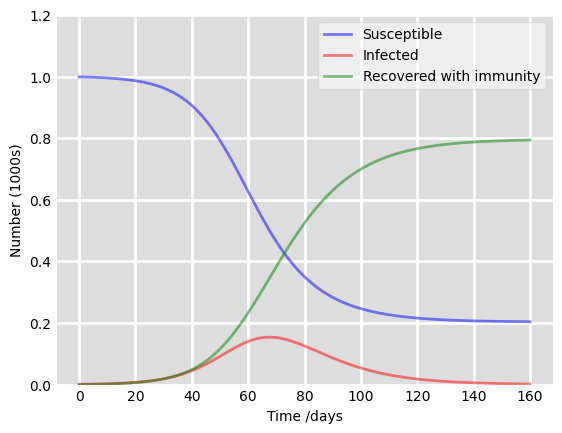

In [12]:
#Source:  https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
#The following code is the SIR with Differential Equations implementation for Question 4.

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, 1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', color='w', lw=2, ls='-')  # Updated line
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

**Question 6:**
How is this implementation the same and different than SIRPLOT and the differential equation SIRmodel? Can you explore changes in the transmission coefficent and recovery rate the same way? Answer here.

ANSWER: 

Similarities: Both SIRPLOT and SIR w/ DE explore the Susceptible, Infected, and Recovered curves. The prime equations for each of the curves balance one another in both cases. For example, SIRPLOT's Sprime = -a is its Iprime = a, and -a + a = 0. Similarly, SIRPLOT's Iprime = -(I/b) is its Rprime = (I/b), and -(I/b) + (I/b) = 0. For SIR w/ DE, dSdt = -beta is the counterpart of bIdt = beta because -beta + beta = 0, and dIdt = -(gamma * I) transfers over to dRdt = (gamma * I) because -(gamma * I) + (gamma * I) = 0. Moreover, both models share variable S for Suceptible. Thus, it is still possible to explore the changes in the transmission coefficient and recovery rate with both SIMPLOT and SIR w/ DE models.

Differences: For finding the rate of each curve, SIRPLOT uses variable names such as alpha (when contact and infection occurs) and beta (the amount of time it takes for a person to recover), whereas SIR w/ DE's equivalent of alpha is called beta and its gamma for its version beta. However, the latter gamma is actually SIRPLOT's correspondent of 1/beta. Moreover, SIRPLOT uses the unaltered variable I for the Infected curve, while SIR w/ DE divides this by population N in order to scale the y-axis range from 0 to 1.2 (representing thousands). In other words, SIRPLOT lists the total population number, whereas SIR w/ DE only shows population as a percentage. The latter may not be ideal if pharmaceutical companies need to know how much medicine to produce.

**SIR with Matrices**

**Question 7:**
What are the advantages and disadvantages of this matrix model?

ANSWER: 

Advantages: SIR w/ Matrices has variables for total number of days, Susceptible, Infected, Recovered, and Deceased curves, and their corresponding rate equations (rnI, rI, and rD), which are directly inputted into the matrix, saving the user time. If the user has experience with matrices, the matrix code makes clear the need to assign four 4-vector arrays to a 4x4 dynamics matrix that is then multiplied with a 4-vector representing an initial state, where every person is healthy (note that the matrix rows have to correspond to the vector columns for matrix multiplication to work). This code makes the relationship Ax = B more undertandable, where Matrix A is multiplied by vector x to result in Matrix B. Having the two for loops is less work at the time of plotting the curves than having to change three lines of code every time a change needs to be made as would be the case with SIMPLOT.

Disadvantages: SIR w/ Matrix can be more complicated to understand than SIMPLOT because it does not take in variables like alpha (contact and infection) and beta (time it takes to recover from an infection) values, making it more restrictive than the SIMPLOT model. Even though the code for SIR w/ Matrix is shorter than SIMPLOT, it takes serious undertstanding of matrices to know how the program works, and where to plug in numbers to get the same results as SIMPLOT. Moreover, it may be confusing to the user to see variables within the matrix and difficult to know where they should reside for the code to work properly. Perhaps a matter of preference, showing percentage on the y-axis (i.e., aS = 1) may not be ideal when trying to mass produce a cure. Instead, a unit population number would help in determining the number of vaccines needed to slow down or stop infections. Similarly, a matter of choice, I prefer to see variables and their corresponding rates separately, and interconnected with one another through variables, as in SIMPLOT, than to have them so close together and assign an individual value of all of aS, as it could take more time to figure what they are and if they will add to 100%.

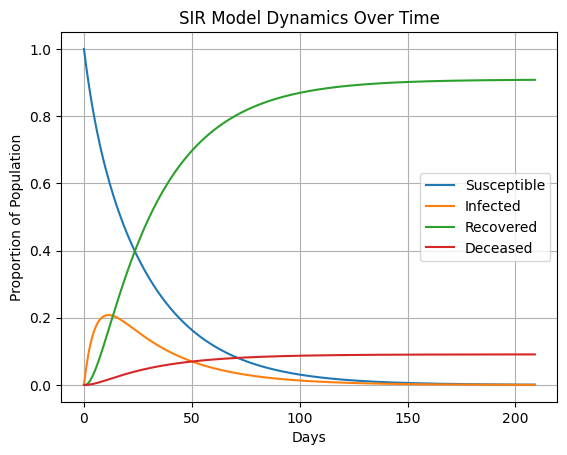

In [13]:
T = 210  # Number of days
a = 0.05  # % new infection each day
aS = 1 - a  # % remain susceptible
rnI = 0.04  # recover no immunity
rI = 0.1  # recover with immunity
rD = 0.01  # die from disease

# Dynamics matrix
A = np.matrix([[aS, rnI, 0, 0],
                [rnI + rD, (1 - (rnI + rI + rD)), 0, 0],
                [0, rI, 1, 0],
                [0, rD, 0, 1]])

# Initial state: everyone healthy
x1 = np.array([1, 0, 0, 0])
stateTraj = np.hstack([np.vstack(x1), np.zeros((4, T-1))])  # Initialize trajectory with 0s

# State transition over time
for t in range(T-1):
    stateTraj[:, t+1] = np.matmul(A, stateTraj[:, t])

# Plotting the results
for i in range(len(stateTraj)):
    plt.plot(range(T), stateTraj[i])

plt.legend(["Susceptible", "Infected", "Recovered", "Deceased"])
plt.xlabel("Days")
plt.ylabel("Proportion of Population")
plt.title("SIR Model Dynamics Over Time")
plt.grid(True)
plt.show()

**Question 8:**
Read Calculus in Context, Chapter 4. This explores additional models that can be explored using this method. 
Copy and paste SIR plot here and  modify to model the Lotka-Voerra Model from page 193 number 7. Explore some of the questions a - f on your own and add some short notes about this model. note: The scaling factor for lynx is 60 (page 194, part c)."plot H and 60L"

b) Explain why a and b have the units hares per month per hare and hares per month per hare-lynx, respectively. What are the units of c and d? Explain why.

Suppose time t is measured in months, and suppose the parameters have values

a = .1 hares per month per hare

b = .005 hares per month per hare-lynx

c = .00004 lynx per month per hare-lynx

d = .04 lynx per month per lynx

This leads to the system of differential equations

H′ = .1H - .005HL

L′ = .00004HL - .04L

ANSWER: 

First, "a" has the units "hares per month per hare" because there is the natural growth rate when the population is all hares and no lynxes, which assumes that the hare population will continue to grow due to not being predated. 

Second, "b" has the units "hares per month per hare-lynx" because there is a natural death rate in the hare population (prey) when there are lynxes present (predator), thus the negative sign.

Third, "c" has the units "lynx per month per hare-lynx" because there is the natural growth rate when the population is all lynxes and no hares, which assumes that the lynx population will continue to grow as they prey on hares.

Fourth, "d" has the units "lynx per month per lynx" because there is the negative growth rate of lynxes as a result death or emigration due to the lack of hares to prey, thus the negative sign.


c) Suppose that you start with 2000 hares and 10 lynx—that is, H(0) = 2000 and L(0) = 10. Describe what happens to the two populations. A good way to do this is to draw graphs of the functions H(t) and L(t). It will be convenient to have the Hare scale run from 0 to 3000, and the Lynx scale from 0 to 50. If you modify the program SIRPLOT, have it plot H and 60L. You should get graphs like those above. Notice that the hare and lynx populations rise and fall in a fashion similar to the rabbits and foxes, but here they oscillate—returning periodically to their original values.

ANSWER: 

Hares and lynxes share a prey-predator relationship, which is represented by equations Hprime and Lprime. First, the hare population will grow logistically if there are no lynxes because hares still face other threats, such as disease and food scarcity. Second, introduce lynxes to the ecosystem so that they prey on hares, and there will be a directly proportional relationship between both populations. For example, more hares mean more food for lynxes. However, the hare population reaches a point where it stops growing (perhaps due to lack of enough resources to keep reproducing, such as food or space) and instead decreases. Since lynxes depend on their prey for survival and since there is a directly proportional relationship between both, the lynx population also decreases. Now, hares regain population numbers with the decrease in lynxes and the now available space and food. The cycle continues and the program generates a graph with peaks (growth rate from positive to negative) and valleys (growth rate from negative to positive).

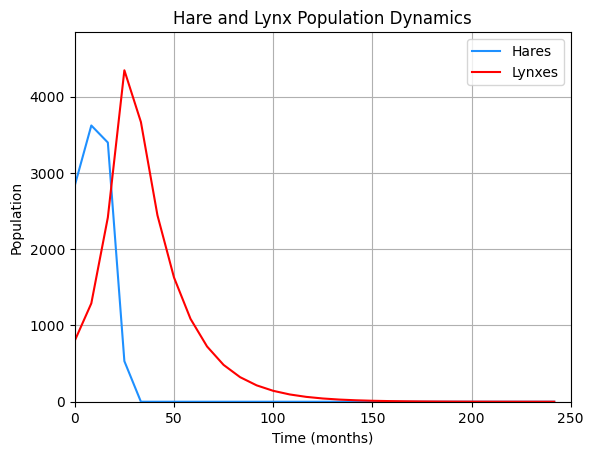

In [14]:
#This is a modification of SIRPLOT to fit the Lotka-Volterra model

# Time parameters
tinitial = 0  # Start time in months
tfinal = 250  # Total time in months
t = tinitial

# Lotka-Volterra parameters
a = 0.1          # Natural growth rate of hares
b = 0.005        # Death rate of hares per lynx
c = 0.00004      # Natural growth rate of lynxes per hare
d = 0.04         # Natural death rate of lynxes

# Initial populations
H = 2000         # Initial hare population
L = 10           # Initial lynx population

numberofsteps = 30  # Number of time steps
deltat = (tfinal - tinitial) / numberofsteps  # Time step size

# Arrays to store population values
h = [H]  # Array for hares
l = [L]  # Array for lynxes
T = [t]  # Array for time values

for k in range(1, numberofsteps + 1):
    # Rate equations
    Hprime = a * H - b * H * L
    Lprime = c * H * L - d * L

    # Update populations
    H += Hprime * deltat
    L += Lprime * deltat

    # Ensure populations do not drop below zero
    H = max(H, 0)
    L = max(L, 0)

    # Store results
    h.append(H)
    l.append(L)
    T.append(t)

    t += deltat

# Convert lists to NumPy arrays for plotting
h_array = np.array(h)
l_array = np.array(l)

# Plotting
plt.plot(T, h_array, color='dodgerblue', label='Hares')  # Hare population
plt.plot(T, l_array * 60, color='red', label='Lynxes')  # Scaled lynx population

# Graph labels
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.legend()
plt.title('Hare and Lynx Population Dynamics')
plt.xlim([0, tfinal])
plt.ylim([0, max(max(h_array), max(l_array * 60)) + 500])  # Adjust y-axis limit for clarity
plt.grid()
plt.show()

**Question 9:**
Chapter 4 explores additional models that can be explored using this method. 
Copy and paste SIR plot here and  modify to model the Fermentation Model from page 195 numbers 8/9/10/11.  HOWEVER, to implement the model you must work through all the steps. YOu may discuss in Piazza.

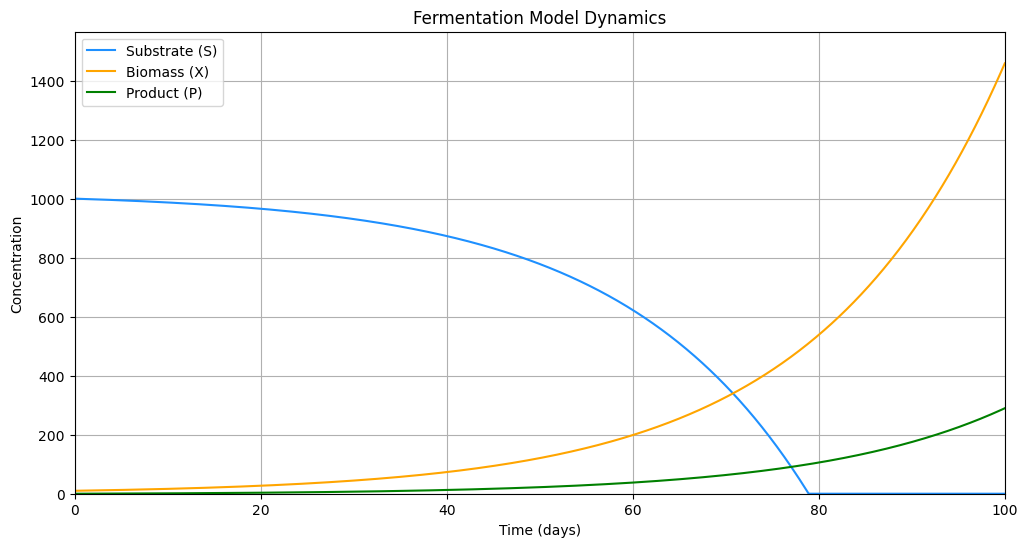

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Time parameters
tinitial = 0  # Start time in days
tfinal = 100  # Total time in days
numberofsteps = 1000  # Number of time steps
t = np.linspace(tinitial, tfinal, numberofsteps)

# Initial conditions
S = 1000  # Initial substrate
X = 10    # Initial biomass
P = 0     # Initial product

# Parameters
mu = 0.1  # Specific growth rate
d = 0.05  # Decay rate of biomass
Y = 0.1   # Yield coefficient

# Arrays to store results
substrate = [S]
biomass = [X]
product = [P]

# Time step size
dt = tfinal / numberofsteps

# Time evolution loop
for _ in range(numberofsteps):
    dSdt = -mu * X
    dXdt = mu * X - d * X
    dPdt = Y * mu * X
    
    # Update populations
    S += dSdt * dt
    X += dXdt * dt
    P += dPdt * dt
    
    # Ensure populations do not drop below zero
    S = max(S, 0)
    X = max(X, 0)
    P = max(P, 0)
    
    # Store results
    substrate.append(S)
    biomass.append(X)
    product.append(P)

# Convert lists to NumPy arrays for plotting
substrate_array = np.array(substrate)
biomass_array = np.array(biomass)
product_array = np.array(product)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, substrate_array[:numberofsteps], color='dodgerblue', label='Substrate (S)')
plt.plot(t, biomass_array[:numberofsteps], color='orange', label='Biomass (X)')
plt.plot(t, product_array[:numberofsteps], color='green', label='Product (P)')

# Graph labels
plt.xlabel('Time (days)')
plt.ylabel('Concentration')
plt.legend()
plt.title('Fermentation Model Dynamics')
plt.xlim([0, tfinal])
plt.ylim([0, max(max(substrate_array), max(biomass_array), max(product_array)) + 100])
plt.grid()
plt.show()


**Question 10:** 

Create your own species (or other) SIR type model. 

For example, can you add elements to SIR that model some percentage of infected dying? Or immunity that is not permentant?  Or create an ecosystem of your own (Aliens eat bears,bears eat mice, Mice drink wine?). You may discuss ideas on Piazza and I can help with your equations :)

Provide code, sample output, and description.

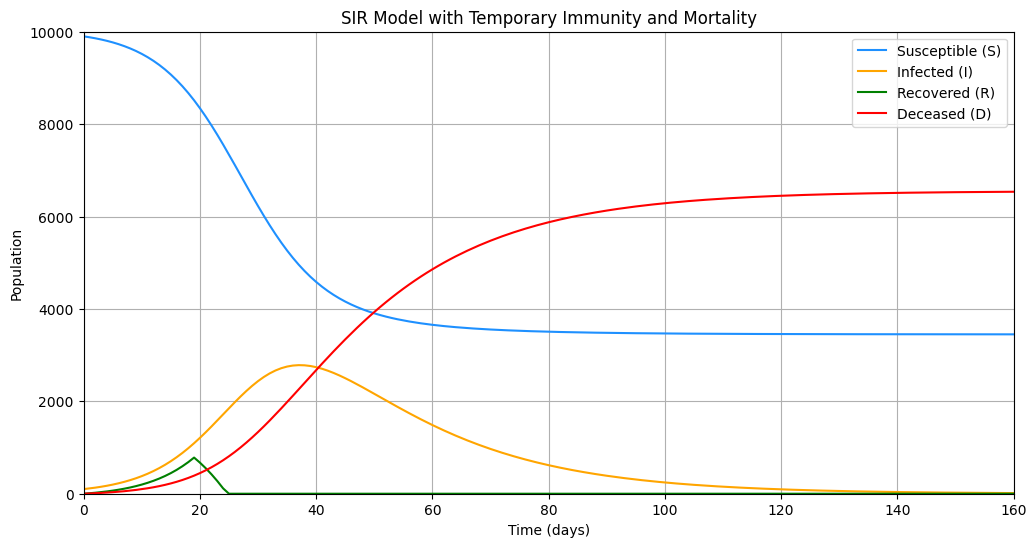

In [16]:
#The output will show how the populations of susceptible, infected, 
#recovered, and deceased Zorbs change over time.


# Parameters
N = 10000      # Total population
I0 = 100       # Initial infected
S0 = N - I0    # Initial susceptible
R0 = 0         # Initial recovered
D0 = 0         # Initial deceased
t_initial = 0  # Start time
t_final = 160  # End time
time_steps = 160  # Number of steps
dt = (t_final - t_initial) / time_steps  # Time step size

# Arrays to store values
S = [S0]
I = [I0]
R = [R0]
D = [D0]
T = [t_initial]

# Rates
beta = 0.3   # Infection rate
gamma = 0.1  # Recovery rate
delta = 0.05 # Mortality rate
immunity_duration = 20  # Days of immunity

# Time evolution loop
for t in range(1, time_steps + 1):
    S_prev = S[-1]
    I_prev = I[-1]
    R_prev = R[-1]
    D_prev = D[-1]

    # Rate equations
    new_infections = beta * S_prev * I_prev / N
    recoveries = gamma * I_prev
    deaths = delta * I_prev

    # Update populations
    S_new = max(0, S_prev - new_infections + recoveries)  # Susceptible
    I_new = max(0, I_prev + new_infections - recoveries - deaths)  # Infected
    R_new = R_prev + recoveries if t < immunity_duration else max(0, R_prev - recoveries)  # Recovered
    D_new = D_prev + deaths  # Deceased

    # Append updated values
    S.append(S_new)
    I.append(I_new)
    R.append(R_new)
    D.append(D_new)
    T.append(t * dt)

# Convert lists to NumPy arrays for plotting
S_array = np.array(S)
I_array = np.array(I)
R_array = np.array(R)
D_array = np.array(D)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(T, S_array, color='dodgerblue', label='Susceptible (S)')
plt.plot(T, I_array, color='orange', label='Infected (I)')
plt.plot(T, R_array, color='green', label='Recovered (R)')
plt.plot(T, D_array, color='red', label='Deceased (D)')

# Labels and title
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('SIR Model with Temporary Immunity and Mortality')
plt.legend()
plt.xlim([0, t_final])
plt.ylim([0, N])
plt.grid()
plt.show()

**Finally:**
    
What are some thoughts about modeling from this project? 
Which model was the simpliest?
Which expressed the underlying ideas best?
Which was good for a "snapshot" of the ideas?
As we use more packages for mathematical modelling do we sometimes loss track of the ideas?

ANSWER:
Writing the SIRPLOT code was the most challenging part of the project, but also the most rewarding because, once it ran correctly, I was able to answer many of the questions and learn quite a lot of information about epidemics and predator-prey relationships. The simplest model for me was the matrix one, although I think it is too simple to be able to find much with it. Moreover, SIRPLOT seems to both express the underlying ideas the best, as well as provide a good snapshot, of the ideas because it is the most straightforward to write and modify. Finally, incremeting the number of mathematical modeling packages can be distracting because one may focus more on making the code work than to remember what it is about.

**Want more?** Check out Chapter 8 in Calculus in Context. This project is the gateway to Dynamical Systems.